# Text Classification

In [1]:
# 1.Represent text as numerical data
# 2.Read text dataset into pandas Library
# 3.Vectorize text dataset (using both CountVectorizer & TFIDFVectorizer)
# 4.Build and evaluate a model
# 5.Compare multiple models
# 6.fine tune vectorizer
# 7.word cloud
# 8.lemmatization and stemming
# 9.sentiment calculation

# 1.Represent text as numerical data

In [2]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# sample text data
sampleTrain = ['i will call you tonight','please help me...','please call a cab please !']

In [4]:
# sample target vector (labelling document sentences)
y = [0,1,0] 
# 0 - Ham label
# 1 - spam label

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
toNumeric = CountVectorizer()

In [6]:
# Get to vocabulary(unique words) from training data
toNumeric.fit(sampleTrain)

CountVectorizer()

In [7]:
# Test the created vocabulary
toNumeric.get_feature_names()

C:\Users\Pooja\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['cab', 'call', 'help', 'me', 'please', 'tonight', 'will', 'you']

In [8]:
# 8 words
len(toNumeric.get_feature_names())

8

In [9]:
#Convert training data into a document_term matrix

sampleTrain_dtm = toNumeric.transform(sampleTrain)
sampleTrain_dtm

<3x8 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [10]:
sampleTrain_dtm.toarray()

array([[0, 1, 0, 0, 0, 1, 1, 1],
       [0, 0, 1, 1, 1, 0, 0, 0],
       [1, 1, 0, 0, 2, 0, 0, 0]], dtype=int64)

In [11]:
pd.DataFrame(sampleTrain_dtm.toarray(),columns=toNumeric.get_feature_names())

,cab,call,help,me,please,tonight,will,you
0,0,1,0,0,0,1,1,1
1,0,0,1,1,1,0,0,0
2,1,1,0,0,2,0,0,0


In [12]:
# Build a model to predict the target
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(sampleTrain_dtm,y)


KNeighborsClassifier(n_neighbors=1)

In [13]:
# Test text for model validation
sampleTest = ["Don't call please"]

In [14]:
#Transform text data into DTM by using generated vocabulary
sampleTest_dtm = toNumeric.transform(sampleTest)

In [15]:
sampleTest_dtm.toarray()

array([[0, 1, 0, 0, 1, 0, 0, 0]], dtype=int64)

In [16]:
# Test build model
knn.predict(sampleTest_dtm)

C:\Users\Pooja\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0])

In [17]:
toNumeric.get_feature_names()

C:\Users\Pooja\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['cab', 'call', 'help', 'me', 'please', 'tonight', 'will', 'you']

Summary:
    vect.fit(sampleTrain) learn the vocabulary from training data
    Vect.transform(sampleTrain) use the trained vocabulary to build DTM from the train data
    vect.transform(sampleTest) use the trained vocabulary to build DTM from the test data and ignore vocabulary it hasn't seen before

# 2.Read text dataset into pandas

In [18]:
# Read sms data into pandas
data = pd.read_table('sms.tsv',header=None,names=['label','message'])

In [19]:
data.shape

(5572, 2)

In [20]:
data.head(5)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
# Target variable 'label' is categorical,convert it into numeric value
data['label_num'] = data.label.map({'ham': 0,'spam':1})

In [22]:
data.head(5)

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [23]:
data.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [24]:
# define X and Y datasets  from 'data'
X = data.message
y = data.label_num

In [25]:
print(X.shape)
print(y.shape)

(5572,)
(5572,)


In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=7)

In [27]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4179,)
(4179,)
(1393,)
(1393,)


In [28]:
# to convert given data into DTM
#step1 use X-train data to create vocabulary
#step2 with created vocabulary ,get DTM for x_train
#step3 with created vocabulary (using X_train data),get DTM for X_test

# 3.Vectorize text dataset

In [29]:
# call the vectorizer
toNumeric = CountVectorizer()

In [30]:
# create vocabulary and create document-term matrix
toNumeric.fit(X_train) ## Create vocabulary
X_train_dtm = toNumeric.transform(X_train)

In [31]:
X_train_dtm

<4179x7535 sparse matrix of type '<class 'numpy.int64'>'
	with 56144 stored elements in Compressed Sparse Row format>

In [32]:
X_test_dtm = toNumeric.transform(X_test)
X_test_dtm

<1393x7535 sparse matrix of type '<class 'numpy.int64'>'
	with 16754 stored elements in Compressed Sparse Row format>

# 4.Building and evaluate a model

In [33]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [34]:
nb.fit(X_train_dtm,y_train)

MultinomialNB()

In [35]:
y_pred_class = nb.predict(X_test_dtm)

In [36]:
# Accuracy calculation
from sklearn import metrics

In [37]:
nb.score(X_test_dtm,y_test)

0.9820531227566404

In [38]:
metrics.accuracy_score(y_test,y_pred_class)

0.9820531227566404

In [39]:
metrics.confusion_matrix(y_test,y_pred_class)

array([[1194,    7],
       [  18,  174]], dtype=int64)

In [40]:
#predict probability for test data instead of labels directly
y_pred_prob = nb.predict_proba(X_test_dtm)[:,1]
y_pred_prob

array([3.11305286e-06, 2.45568879e-06, 3.66677804e-04, ...,
       9.28339673e-01, 4.13005037e-01, 1.36208930e-07])

In [41]:
# calculate AUC _ ROC 
metrics.roc_auc_score(y_test,y_pred_prob)

0.9922894116014432

# 5.Compare multiple models

In [42]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [43]:
lr.fit(X_train_dtm,y_train)

LogisticRegression()

In [44]:
y_pred_class = lr.predict(X_test_dtm)

In [45]:
lr.score(X_test_dtm,y_test)

0.9798994974874372

In [46]:
# calculate predicted probability for x_test_dtm

In [47]:
y_pred_prob = lr.predict_proba(X_test_dtm)[:,1]
y_pred_prob

array([0.0062285 , 0.01911204, 0.00453425, ..., 0.50834525, 0.96176089,
       0.00344967])

In [48]:
metrics.roc_auc_score(y_test,y_pred_prob)

0.9951819664168748

# TF-IDF 

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [50]:
toNumericTFIDF = TfidfVectorizer()

In [51]:
toNumericTFIDF.fit(sampleTrain)

TfidfVectorizer()

In [52]:
toNumericTFIDF.get_feature_names()

C:\Users\Pooja\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['cab', 'call', 'help', 'me', 'please', 'tonight', 'will', 'you']

In [53]:
len(toNumericTFIDF.get_feature_names())

8

In [54]:
sampleTrainTFIDF_dtm = toNumericTFIDF.transform(sampleTrain)

In [55]:
sampleTrainTFIDF_dtm.toarray()

array([[0.        , 0.40204024, 0.        , 0.        , 0.        ,
        0.52863461, 0.52863461, 0.52863461],
       [0.        , 0.        , 0.62276601, 0.62276601, 0.4736296 ,
        0.        , 0.        , 0.        ],
       [0.50689001, 0.38550292, 0.        , 0.        , 0.77100584,
        0.        , 0.        , 0.        ]])

In [56]:
pd.DataFrame(sampleTrainTFIDF_dtm.toarray(),columns=toNumericTFIDF.get_feature_names())

,cab,call,help,me,please,tonight,will,you
0,0.00000,0.402040,0.000000,0.000000,0.000000,0.528635,0.528635,0.528635
1,0.00000,0.000000,0.622766,0.622766,0.473630,0.000000,0.000000,0.000000
2,0.50689,0.385503,0.000000,0.000000,0.771006,0.000000,0.000000,0.000000


In [57]:
sampleTrain

['i will call you tonight', 'please help me...', 'please call a cab please !']

In [58]:
# we can built model using TF-IDF just like Count vectorizer 

# 6.Fine tune vectorizer

In [59]:
# Default parameters for Countvectorizer
toNumeric = CountVectorizer()
toNumeric

CountVectorizer()

In [60]:
#Remove English stop words (common words like the,a,and etc.,)

toNumeric = CountVectorizer(stop_words='english')
toNumeric.fit(X_train)
len(toNumeric.get_feature_names())

C:\Users\Pooja\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


7271

In [61]:
toNumeric.get_feature_names()[-10:]

['zeros',
 'zhong',
 'zindgi',
 'zoe',
 'zogtorius',
 'zoom',
 'zouk',
 'zyada',
 'èn',
 'ú1']

In [62]:
# Include 1 and 2-grams
toNumeric = TfidfVectorizer(ngram_range=(1,2))
toNumeric.fit(X_train)
len(toNumeric.get_feature_names())

41571

ngram_range parameter using to take instead of taking 1 word at a time we can take pair of words at a time

In [63]:
toNumeric =CountVectorizer(max_df = 0.75)
toNumeric.fit(X_train)
len(toNumeric.get_feature_names())

7535

using max_df If a word appears more then 75% of the document don't consider it

In [64]:
toNumeric =CountVectorizer(min_df = 5)
toNumeric.fit(X_train)
len(toNumeric.get_feature_names())

1504

using min_df if a word doesn't appearing atleast in 5 document don't consider it

# 7.Word Cloud

In [65]:
# Visualization of Word Frequency we use a library called wordcloud

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [67]:
!pip install wordcloud

In [68]:
data.head(5)

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


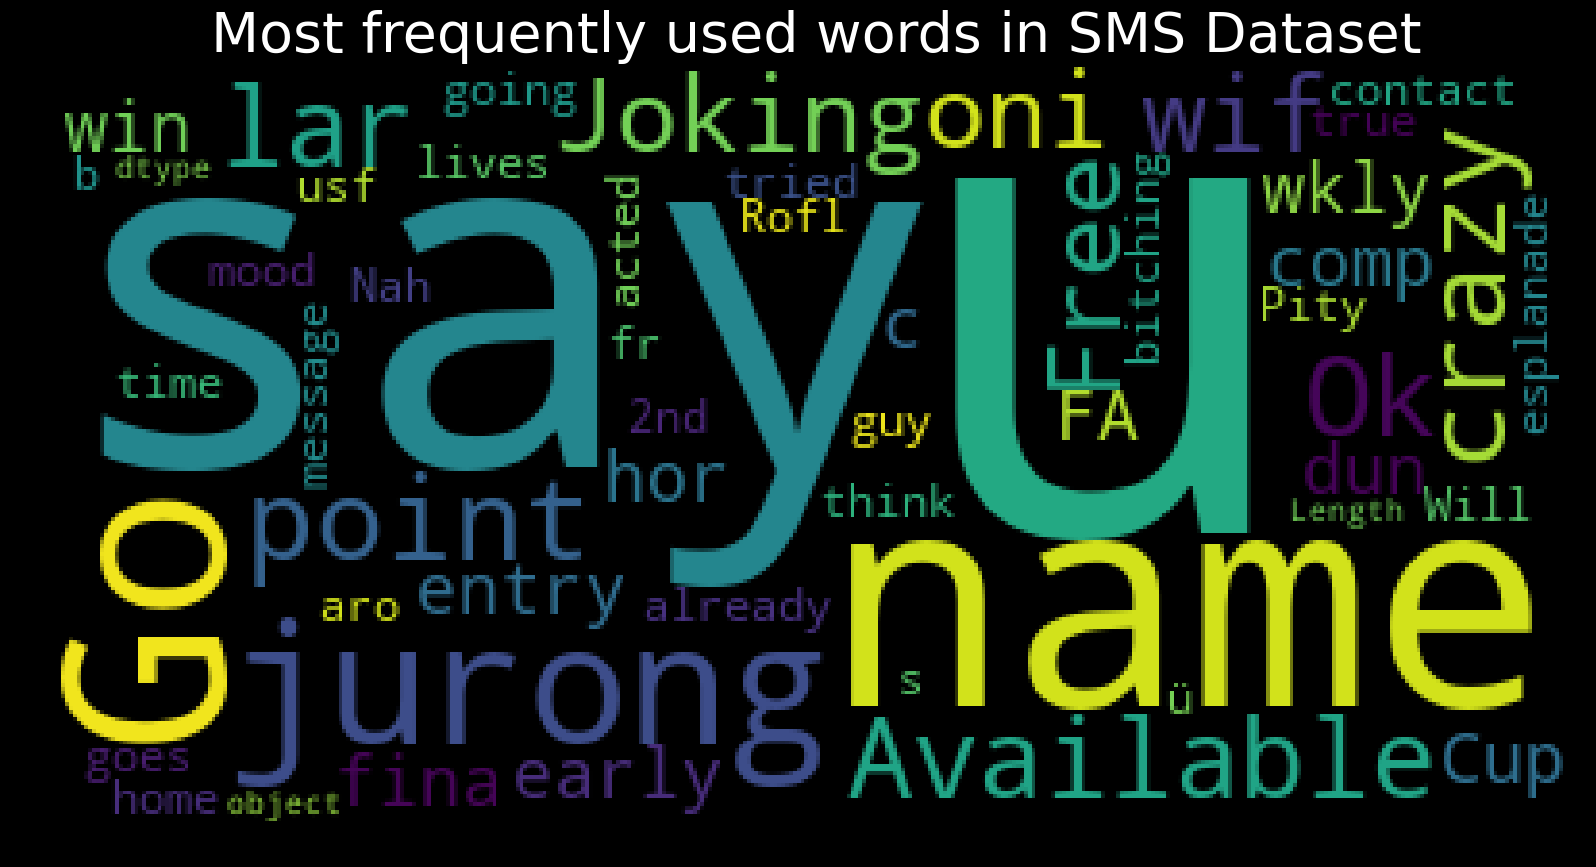

In [69]:
wc = WordCloud()
wc.generate(str(data['message']))
plt.figure(figsize=(20,10),facecolor='k')
plt.title('Most frequently used words in SMS Dataset',fontsize=40,color='white')
plt.imshow(wc)
plt.show()

# 8.Lemmatization & Stemming

In [70]:
import nltk

In [71]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

In [72]:
#create an object class PorterStemmer
porter = PorterStemmer()
lancaster = LancasterStemmer()

In [73]:
# provide a word to be stemmed
print(porter.stem('cats'))
print(porter.stem('trouble'))
print(porter.stem('troubling'))
print(porter.stem('troubled'))

cat
troubl
troubl
troubl


In [74]:
# lets apply stemming for complete sentence
sentence = 'pythoners are very intelligent and work very pythonly and now they are pythoning their way to success.'
porter.stem(sentence)

'pythoners are very intelligent and work very pythonly and now they are pythoning their way to success.'

In [77]:
from textblob import TextBlob

In [76]:
!pip install textblob

     -------------------------------------- 636.8/636.8 kB 1.8 MB/s eta 0:00:00


In [78]:
sent = TextBlob(sentence)

# 9.Sentiment Calculation

In [82]:
text = 'I hate anything that goes in my ear'

In [83]:
result = TextBlob(text)

In [84]:
result.sentiment.polarity

-0.8

In [85]:
# inbuilt library

In [89]:
text1 = 'I am very happy today,I like to eat biryani'

In [90]:
result1 = TextBlob(text1)

In [91]:
result1.sentiment.polarity

1.0